In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Load your images here
img1 = cv2.imread("/Users/akashpaijwar/Documents/Winter Project/CV101/1st/Assignment1 SS/Hybrid/download (1).jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/Users/akashpaijwar/Documents/Winter Project/CV101/1st/Assignment1 SS/Hybrid/download.jpeg", cv2.IMREAD_GRAYSCALE)


In [3]:
# Resize images to [256, 256]
img1 = cv2.resize(img1, (256, 256))
img2 = cv2.resize(img2, (256, 256))


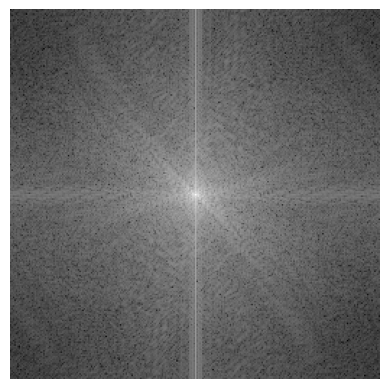

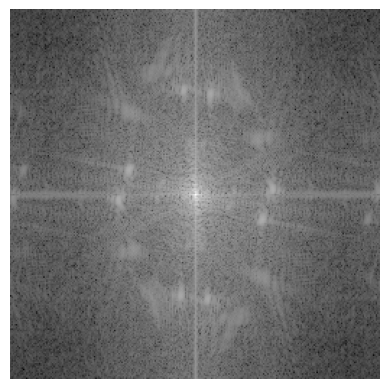

In [4]:
# Fourier Transform
f1 = np.fft.fft2(img1)
Fshift1 = np.fft.fftshift(f1)

plt.imshow(np.log1p(np.abs(Fshift1)), cmap='gray')
plt.axis('off')
plt.show()

f2 = np.fft.fft2(img2)
Fshift2 = np.fft.fftshift(f2)

plt.imshow(np.log1p(np.abs(Fshift2)), cmap='gray')
plt.axis('off')
plt.show()



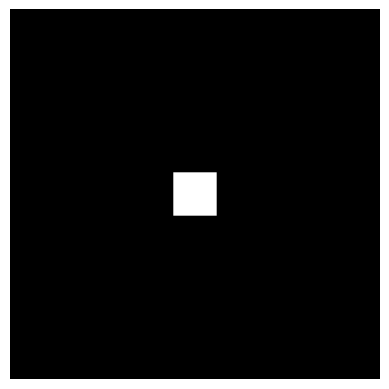

In [10]:
# Rectangular Low pass filter
M, N = img1.shape
H_lowpass = np.zeros((M, N), dtype=np.float32)

# Set the dimensions of the rectangular low-pass filter
rectangular_width = 30
rectangular_height = 30

H_lowpass[
    M // 2 - rectangular_height // 2 : M // 2 + rectangular_height // 2,
    N // 2 - rectangular_width // 2 : N // 2 + rectangular_width // 2
] = 1

plt.imshow(H_lowpass, cmap='gray')
plt.axis('off')
plt.show()

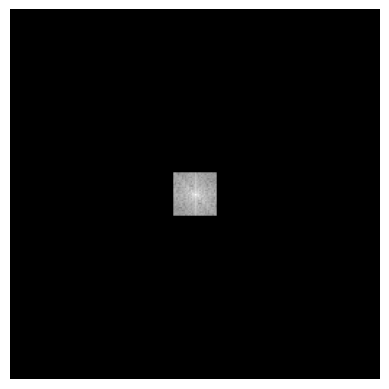

In [11]:
# Apply Rectangular Low Pass Filter
Gshift_lowpass = Fshift1 * H_lowpass
plt.imshow(np.log1p(np.abs(Gshift_lowpass)), cmap='gray')
plt.axis('off')
plt.show()

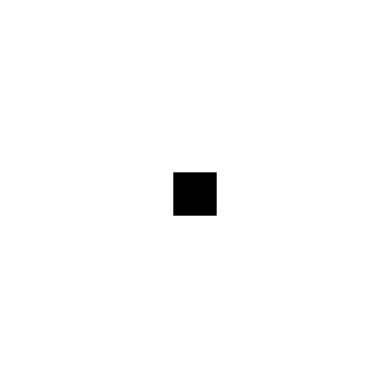

In [13]:

H_highpass = 1 - H_lowpass

plt.imshow(H_highpass, cmap='gray')
plt.axis('off')
plt.show()


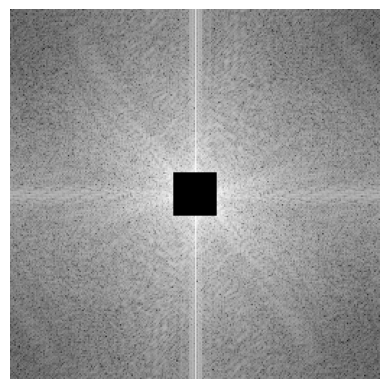

In [17]:
Gshift_highpass = Fshift2 * H_highpass
plt.imshow(np.log1p(np.abs(Gshift_highpass)), cmap='gray')
plt.axis('off')
plt.show()

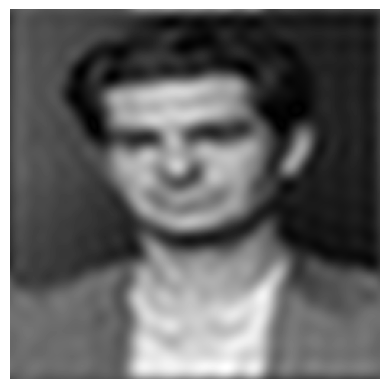

In [19]:
G_lowpass = np.fft.ifftshift(Gshift_lowpass)
g_lowpass = np.abs(np.fft.ifft2(G_lowpass))

plt.imshow(g_lowpass, cmap='gray')
plt.axis('off')
plt.show()

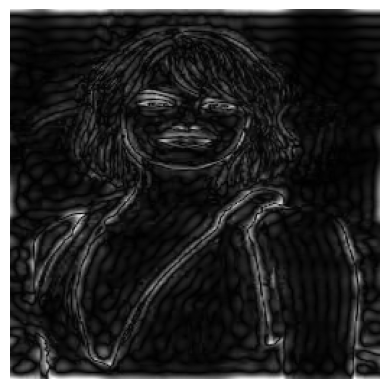

In [20]:
G_highpass = np.fft.ifftshift(Gshift_highpass)
g_highpass = np.abs(np.fft.ifft2(G_highpass))

plt.imshow(g_highpass, cmap='gray')
plt.axis('off')
plt.show()

In [21]:
combined_spectrum = (Gshift_lowpass + Gshift_highpass) / 2

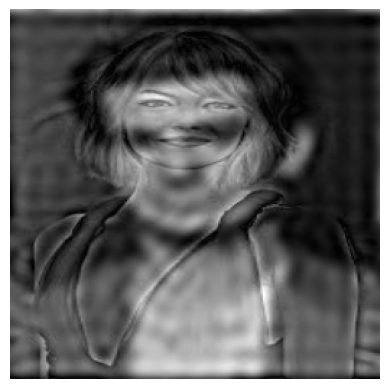

In [23]:
hybrid_spectrum = np.fft.ifftshift(combined_spectrum)
hybrid_image = np.abs(np.fft.ifft2(G))

plt.imshow(hybrid_image, cmap='gray')
plt.axis('off')
plt.show()